# Nettoyage de donn√©es
supprimer les doublons , les valeurs manquants ....  


In [12]:
import pandas as pd

# Charger le dataset depuis le chemin fourni

file_path = "../Data/covtype.data"  
df = pd.read_csv(file_path, header=None)
column_names = [
     'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
    'Wilderness_Area1','Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
      'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
    'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11',
    'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17',
    'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23',
    'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29',
    'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35',
    'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40', 'Cover_Type',
    
]

df.columns = column_names


# V√©rification des valeurs manquantes
missing_values = df.isnull().sum()

print("Valeurs manquantes par colonne:")
print(missing_values)

# Gestion des valeurs manquantes
if missing_values.any():
    # Si une colonne a des valeurs manquantes, les supprimer
    # Si la proportion des valeurs manquantes est inf√©rieure √† 5%, on supprime les lignes
    threshold = 0.05  # 5% des lignes avec des valeurs manquantes

    rows_with_missing_values = df[df.isnull().any(axis=1)]  # Trouver les lignes avec des valeurs manquantes
    rows_percentage = len(rows_with_missing_values) / len(df)

    if rows_percentage < threshold:
        print(f"Avant traitement, il y a {len(rows_with_missing_values)} lignes avec des valeurs manquantes.")
        df = df.dropna()  # Suppression des lignes avec des valeurs manquantes
        print(f"Apr√®s traitement, le nombre de lignes restantes est : {df.shape[0]}")
        print(f"Nombre de lignes supprim√©es : {len(rows_with_missing_values)}")
    else:
        print("Les valeurs manquantes d√©passent 5% des donn√©es, il est recommand√© d'explorer l'imputation.")

# Suppression des doublons
initial_rows = df.shape[0]
df = df.drop_duplicates()  
removed_duplicates = initial_rows - df.shape[0]  # Calculer le nombre de doublons supprim√©s

print(f"Nombre de doublons supprim√©s : {removed_duplicates}")

# Afficher la taille du DataFrame apr√®s gestion des valeurs manquantes et suppression des doublons
print(f"Taille du DataFrame apr√®s traitement: {df.shape}")

df.to_csv('../Data/covtypeClean.data', index=False)



Valeurs manquantes par colonne:
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Typ

# Analyse statistique 
Calcule de la moyen √©cart type , et d√©tection des anomalie  .... 

In [13]:
import matplotlib.pyplot as plt
file_path = "../Data/covtypeClean.data"  # Ton chemin de fichier nettoy√©
df = pd.read_csv(file_path)

print("\n=== Analyse Statistique G√©n√©rale ===\n")

# Moyenne
moyennes = df.mean()

# M√©diane
medians = df.median()

# Ecart-type
ecarts_types = df.std()

# Quartiles
quartiles = df.quantile([0.25, 0.5, 0.75])

# R√©sum√© statistique complet
print("\nR√©sum√© statistique (describe()):")
print(df.describe(), "\n")


=== Analyse Statistique G√©n√©rale ===


R√©sum√© statistique (describe()):
           Elevation         Aspect          Slope  \
count  581012.000000  581012.000000  581012.000000   
mean     2959.365301     155.656807      14.103704   
std       279.984734     111.913721       7.488242   
min      1859.000000       0.000000       0.000000   
25%      2809.000000      58.000000       9.000000   
50%      2996.000000     127.000000      13.000000   
75%      3163.000000     260.000000      18.000000   
max      3858.000000     360.000000      66.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                     581012.000000                   581012.000000   
mean                         269.428217                       46.418855   
std                          212.549356                       58.295232   
min                            0.000000                     -173.000000   
25%                          108.000000                      

#### D√©tection des Outliers

In [14]:

print("\n=== D√©tection des Outliers (M√©thode IQR) ===\n")

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

print("Nombre d'outliers d√©tect√©s par colonne :")
print(outliers.sum(), "\n")

total_outliers = outliers.sum().sum()
print(f"Nombre total d'outliers d√©tect√©s dans tout le dataset : {total_outliers}\n")

rows_with_outliers = df[outliers.any(axis=1)]
print(f"Nombre de lignes contenant au moins un outlier : {len(rows_with_outliers)}\n")

print("Exemple de lignes avec outliers :")
print(rows_with_outliers.head(), "\n")


=== D√©tection des Outliers (M√©thode IQR) ===

Nombre d'outliers d√©tect√©s par colonne :
Elevation                              15569
Aspect                                     0
Slope                                  15316
Horizontal_Distance_To_Hydrology       14557
Vertical_Distance_To_Hydrology         31463
Horizontal_Distance_To_Roadways          669
Hillshade_9am                          17433
Hillshade_Noon                         15672
Hillshade_3pm                           7832
Horizontal_Distance_To_Fire_Points     31157
Wilderness_Area1                           0
Wilderness_Area2                       29884
Wilderness_Area3                           0
Wilderness_Area4                       36968
Soil_Type1                              3031
Soil_Type2                              7525
Soil_Type3                              4823
Soil_Type4                             12396
Soil_Type5                              1597
Soil_Type6                              6575
Soil_Typ

#### V√©rification des colonnes inutiles

In [15]:


print("\n=== Analyse des colonnes probl√©matiques ===\n")

# Colonnes avec une seule valeur unique
colonnes_uniques = (df.nunique() == 1)
colonnes_uniques_list = colonnes_uniques[colonnes_uniques].index.tolist()

if colonnes_uniques_list:
    print(f"Colonnes avec une seule valeur unique ({len(colonnes_uniques_list)} colonnes) :")
    print(colonnes_uniques_list)
    print("\nStatistiques de ces colonnes :")
    print(df[colonnes_uniques_list].describe(), "\n")

# Colonnes avec √©cart-type tr√®s faible (presque constante)
seuil_ecart_type = 1e-3
colonnes_faible_variance = ecarts_types[ecarts_types < seuil_ecart_type].index.tolist()

if colonnes_faible_variance:
    print(f"Colonnes avec √©cart-type tr√®s faible (< {seuil_ecart_type}) ({len(colonnes_faible_variance)} colonnes) :")
    print(colonnes_faible_variance)
    print("\nStatistiques de ces colonnes :")
    print(df[colonnes_faible_variance].describe(), "\n")
else:
    print("Aucune colonne avec un √©cart-type tr√®s faible.\n")



=== Analyse des colonnes probl√©matiques ===

Aucune colonne avec un √©cart-type tr√®s faible.



#### Visualisation avec BoxPlot :



=== Visualisation des Outliers (BoxPlot) ===



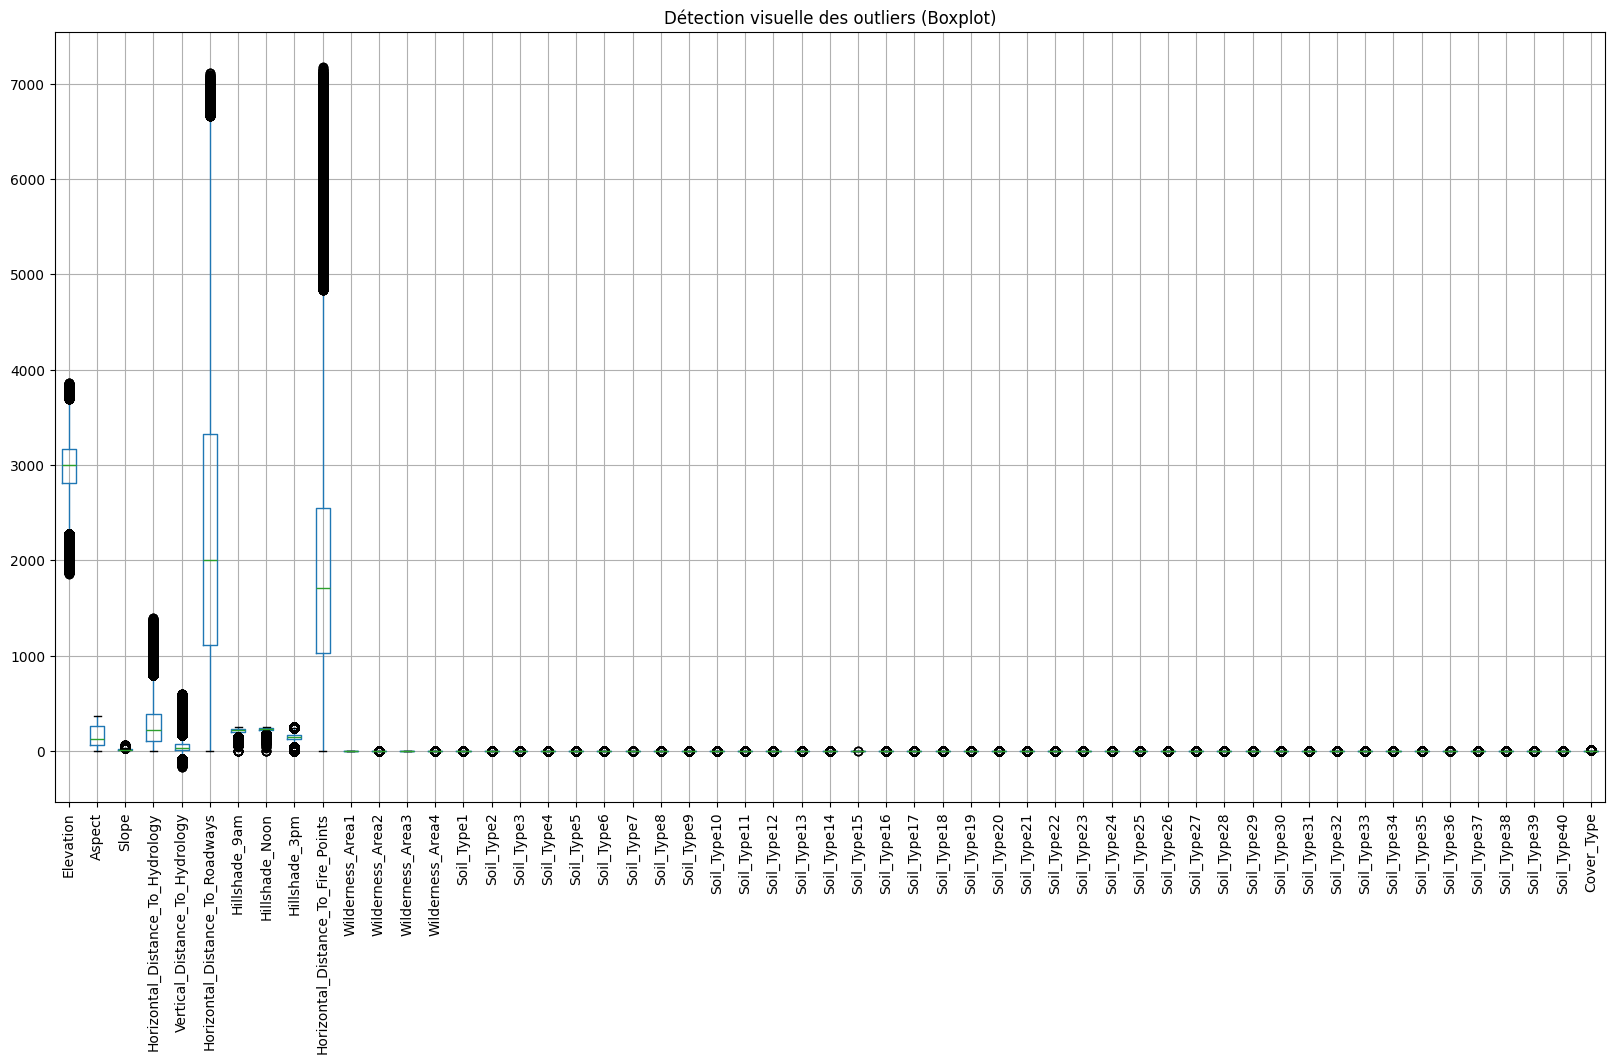

In [16]:
print("\n=== Visualisation des Outliers (BoxPlot) ===\n")

plt.figure(figsize=(20, 10))
df.boxplot(rot=90)
plt.title("D√©tection visuelle des outliers (Boxplot)")
plt.xticks(rotation=90)
plt.show()

#### Visualisation de l'√©cart-type pour les 10 premi√®res colonnes non binaire :



=== Visualisation de l'√âcart-Type (10 premi√®res colonnes) ===



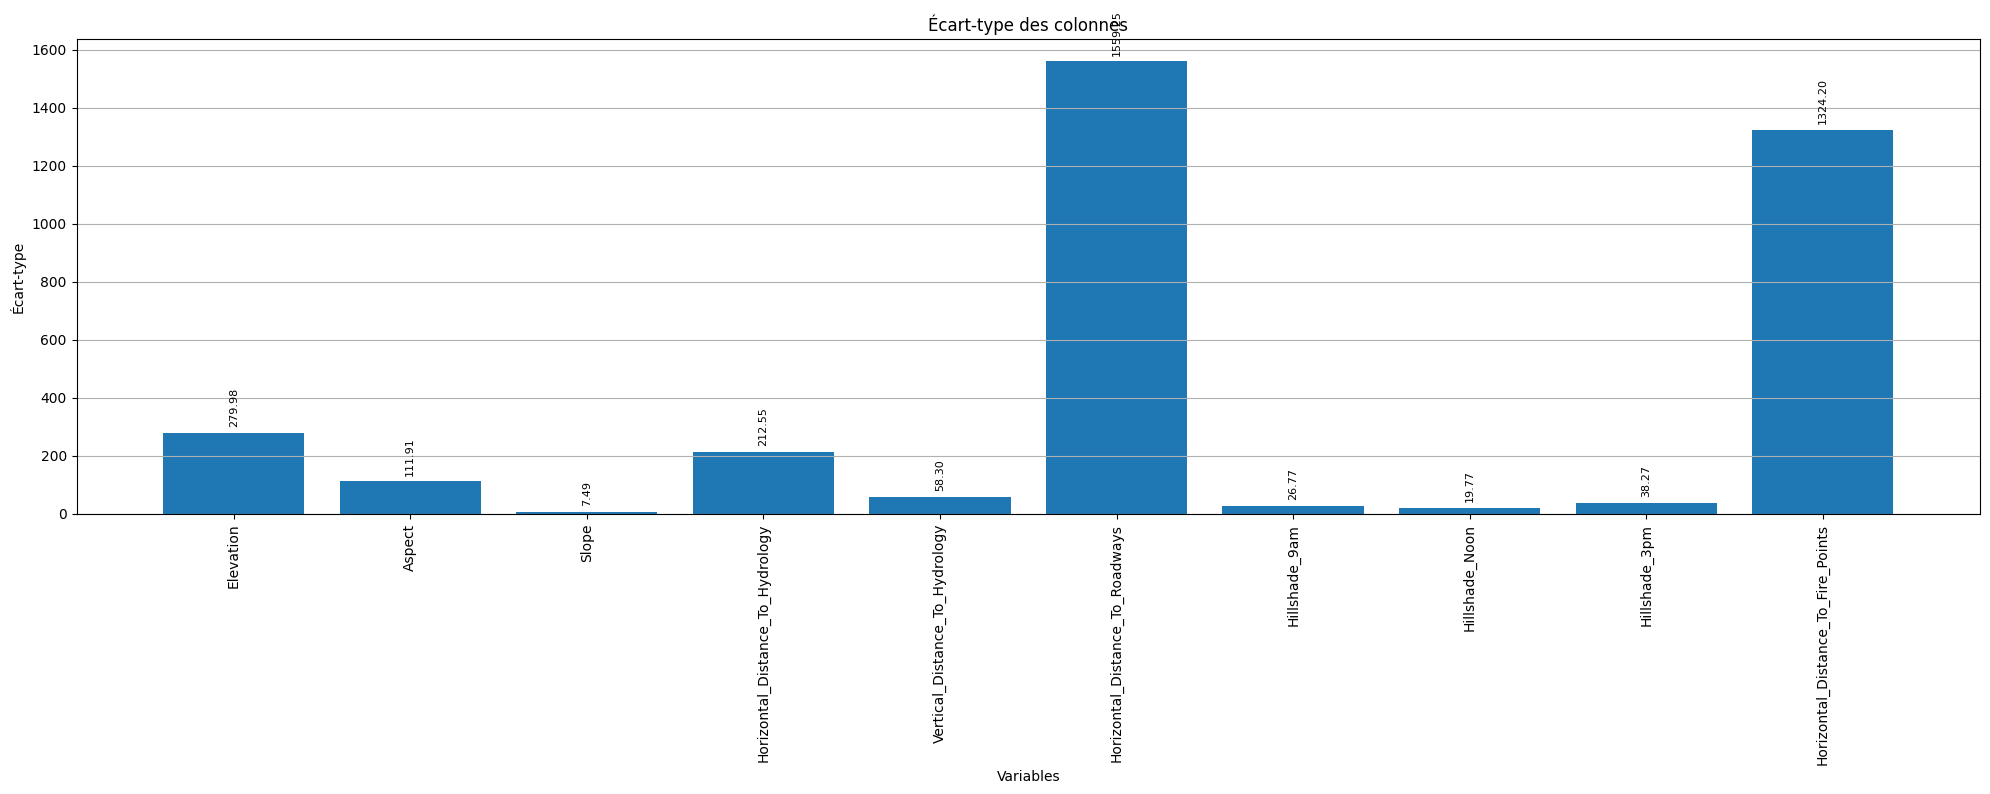

In [17]:


print("\n=== Visualisation de l'√âcart-Type (10 premi√®res colonnes) ===\n")

# S√©lectionner les 10 premi√®res colonnes
first_10_columns = df.columns[:10]
ecarts_types_10 = ecarts_types[first_10_columns]

# Tracer le barplot
plt.figure(figsize=(20, 8))
bars = plt.bar(ecarts_types_10.index, ecarts_types_10.values)
plt.title("√âcart-type des colonnes")
plt.xlabel("Variables")
plt.ylabel("√âcart-type")
plt.xticks(rotation=90)
plt.grid(axis='y')

# Ajouter les valeurs exactes au-dessus des barres
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height+20, f'{height:.2f}',
             ha='center', va='bottom', fontsize=8, rotation=90)

plt.tight_layout()
plt.show()



#### Heatmap de corr√©lation & Histogrammes

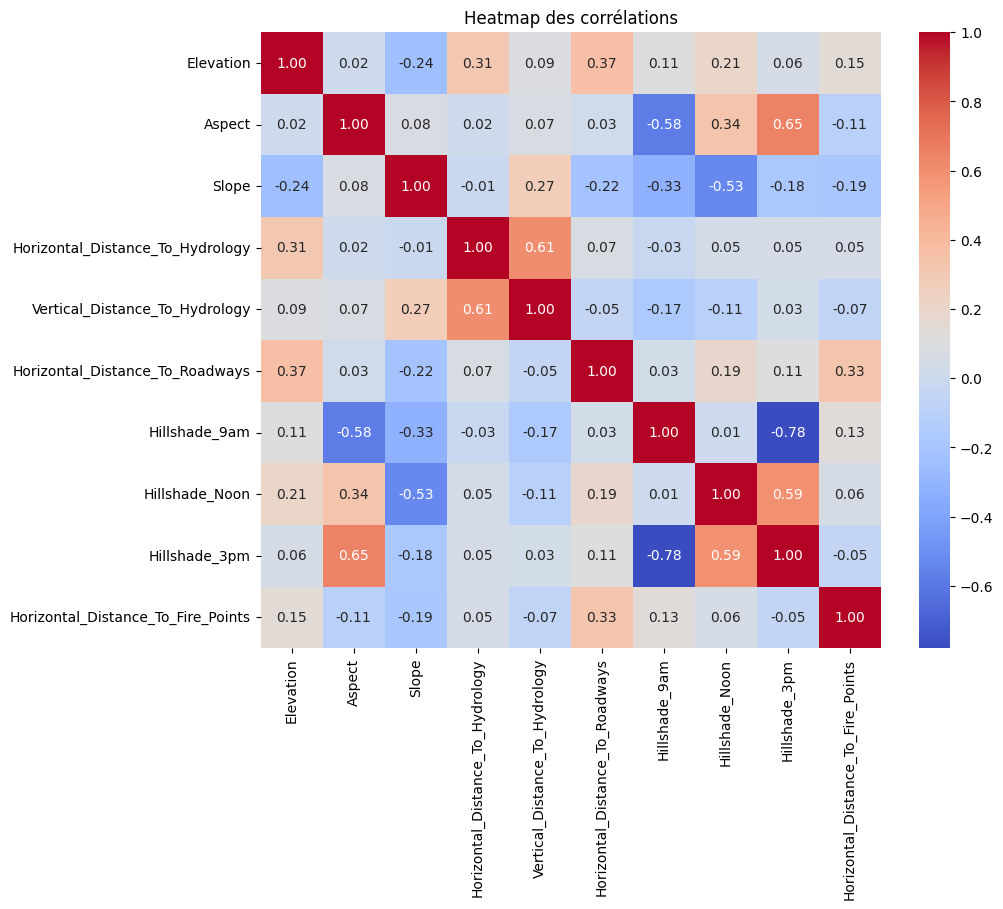

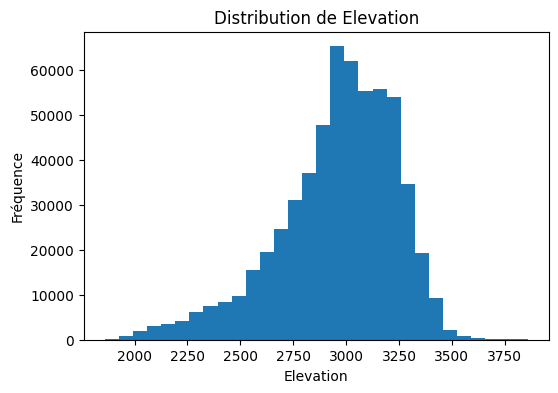

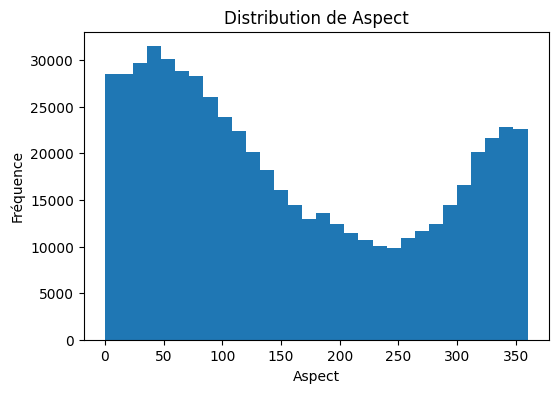

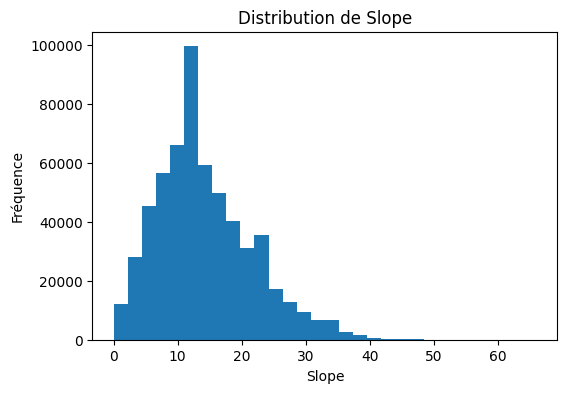

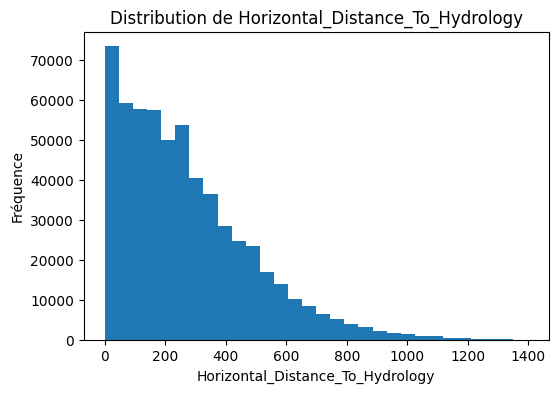

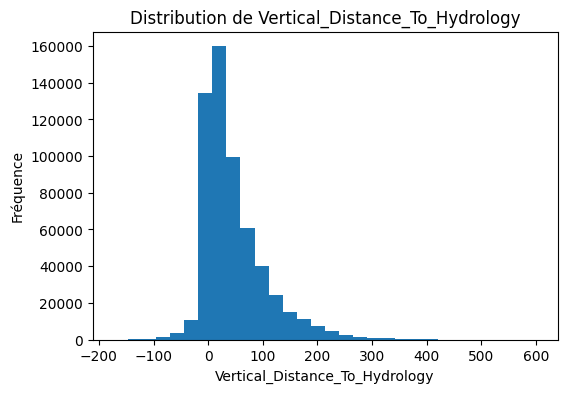

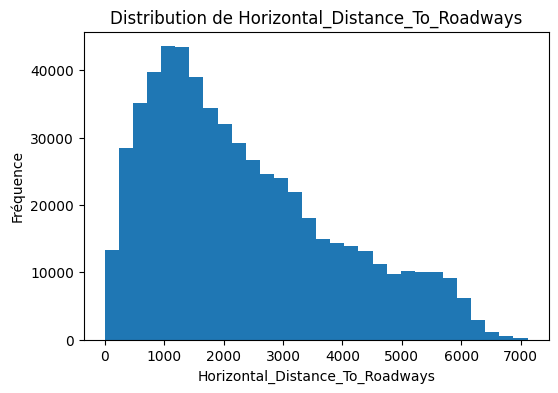

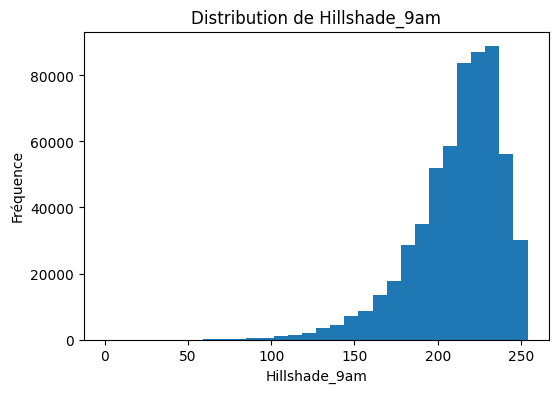

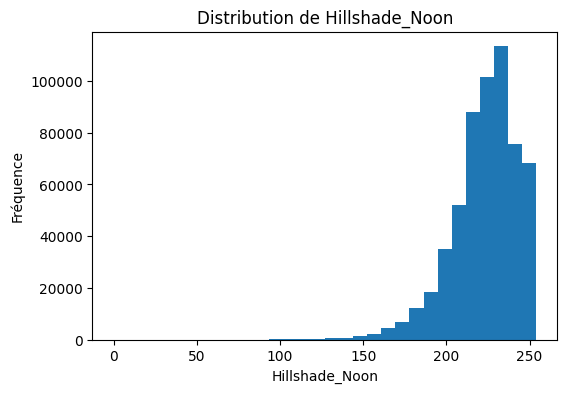

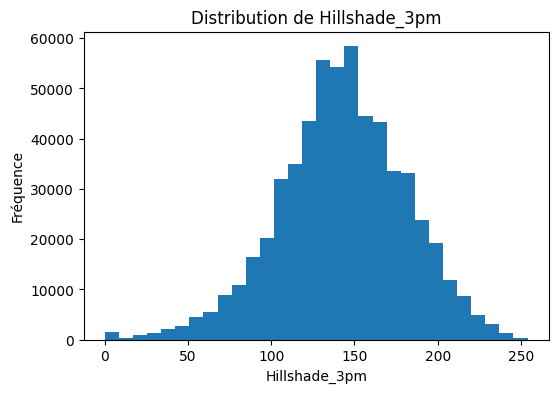

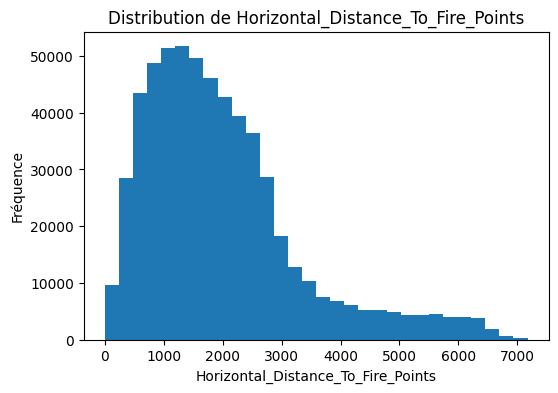

In [18]:
import seaborn as sns
cols_cont = df.columns[:10]

corr_matrix = df[cols_cont].corr()

# Heatmap de correlation
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap des corr√©lations')
plt.show()

# histogrammes
for col in cols_cont:
    plt.figure(figsize=(6, 4))
    df[col].hist(bins=30)
    plt.title(f'Distribution de {col}')
    plt.xlabel(col)
    plt.ylabel('Fr√©quence')
    plt.grid(False)
    plt.show()


# La Normalisation 
R√©gl√© le probleme des anomalie 

In [19]:
from sklearn.preprocessing import StandardScaler

# S√©lectionner les 10 premi√®res colonnes qui sont pas des collone binaire les autre sont des collone binaire on fait pas la normalisation 
columns_to_normalize = df.columns[:10]

scaler = StandardScaler()

# Appliquer la normalisation (standardisation) sur les colonnes s√©lectionn√©es
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])


# Sauvegarder le dataset normalis√© dans un nouveau fichier
normalized_file_path = "../Data/covtypeNormalized.data"
df.to_csv(normalized_file_path, index=False)

print(f"Le dataset normalis√© a √©t√© sauvegard√© sous : {normalized_file_path}")


Le dataset normalis√© a √©t√© sauvegard√© sous : ../Data/covtypeNormalized.data


### üìâ Algorithme ACP (Analyse en Composantes Principales)

Nous avons appliqu√© l'**Analyse en Composantes Principales (ACP)** sur les 10 premi√®res variables continues du jeu de donn√©es **normalis√©** afin de r√©duire la dimensionnalit√© tout en conservant un maximum d'information.

#### Objectifs :
- Identifier les variables les plus importantes pour chaque composante.
- Visualiser les donn√©es projet√©es sur les deux premi√®res composantes principales.
- Mieux comprendre la structure des donn√©es et les redond


In [ ]:
from sklearn.decomposition import PCA

df = pd.read_csv('../Data/covtypeNormalized.data')

X = df[cols_cont]

# PCA avec 90% de variance expliqu√©e
pca = PCA(n_components=0.90, svd_solver='full')
X_pca = pca.fit_transform(X)

loadings = pd.DataFrame(pca.components_, columns=cols_cont,
                        index=[f"PC{i+1}" for i in range(pca.n_components_)])
explained = pd.Series(pca.explained_variance_ratio_, index=loadings.index)

# Loadings = vecteurs des composantes principales
# Afficher l'importance de chaque variable pour chaque PC
for pc in loadings.index:
    print(f"\n{pc} (Variance expliqu√©e: {explained[pc]:.2%})")
    print(loadings.loc[pc].sort_values(ascending=False))

# Biplot 2D sur les 10 premi√®res composantes
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.3, label='Observations', s=10)

# Tracer les vecteurs (loadings) les plus importants (top 7 ici)
arrow_scale = 3
top_vars = loadings.loc[["PC1", "PC2"]].abs().sum().sort_values(ascending=False).head(7).index

for var in top_vars:
    ax.arrow(0, 0,
             loadings.loc["PC1", var] * arrow_scale,
             loadings.loc["PC2", var] * arrow_scale,
             color='red', head_width=0.1)
    ax.text(loadings.loc["PC1", var] * arrow_scale * 1.1,
            loadings.loc["PC2", var] * arrow_scale * 1.1,
            var, color='red')

ax.set_xlabel(f'PC1 ({explained["PC1"]:.2%} variance)')
ax.set_ylabel(f'PC2 ({explained["PC2"]:.2%} variance)')
ax.set_title('Biplot PCA (2 composantes principales)')
ax.axhline(0, color='gray', linewidth=0.5)
ax.axvline(0, color='gray', linewidth=0.5)
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()


### üìä Encoding & Separation of data

Afin de mieux √©valuer la performance du mod√®le et √©viter le surapprentissage (**overfitting**), nous avons s√©par√© le jeu de donn√©es en trois sous-ensembles distincts :

- **70% pour l'entra√Ænement** : utilis√© pour ajuster les param√®tres du mod√®le.
- **15% pour la validation (dev set)** : utilis√© pour tester diff√©rentes versions du mod√®le et ajuster les hyperparam√®tres.
- **15% pour le test** : utilis√© uniquement √† la fin pour √©valuer les performances finales du mod√®le sur des donn√©es jamais vues.


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

target = 'Cover_Type'

X = df.drop(columns=[target])
y = df[target]

# Split into train, dev, and test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_dev, X_test, y_dev, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(X_train.shape)
print(X_dev.shape)
print(X_test.shape)

# Encode target labels
label_encoder = LabelEncoder()
y_train_encoded = pd.DataFrame(label_encoder.fit_transform(y_train.values.ravel()), columns=['Cover_Type'])
y_dev_encoded = pd.DataFrame(label_encoder.transform(y_dev.values.ravel()), columns=['Cover_Type'])
y_test_encoded = pd.DataFrame(label_encoder.transform(y_test.values.ravel()), columns=['Cover_Type'])

# Save feature sets
X_train.to_csv('../Data/Processed/X_train.csv', index=False)
X_dev.to_csv('../Data/Processed/X_val.csv', index=False)
X_test.to_csv('../Data/Processed/X_test.csv', index=False)

# Save encoded label sets
y_train_encoded.to_csv('../Data/Processed/y_train.csv', index=False)
y_dev_encoded.to_csv('../Data/Processed/y_val.csv', index=False)
y_test_encoded.to_csv('../Data/Processed/y_test.csv', index=False)


(406708, 54)
(87152, 54)
(87152, 54)


## Maintenant on a finaliser le Pr√©traitement des Donn√©es on Passe pour le Modelisation 